# 📘 **How to Use This Template**

## **Quick Start Guide**

This notebook provides a comprehensive, structured framework for data analysis and predictive modeling following the **PACE methodology** (Plan → Analyze → Construct → Execute).

### **Before You Begin:**
1. **Save a copy** of this template for your specific project
2. **Update the Project Overview** section with your project details
3. **Remove sections** that don't apply to your analysis type
4. **Add code cells** below each markdown section as you progress

### **Workflow by Project Type:**

**For Classification Projects** (e.g., churn prediction, fraud detection):
- Use all sections including class imbalance handling
- Focus on: Logistic Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: AUC-ROC, Precision, Recall, F1-score

**For Regression Projects** (e.g., price prediction, forecasting):
- Skip class imbalance sections
- Focus on: Linear Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: RMSE, MAE, R², Adjusted R²

**For Exploratory/Descriptive Analysis:**
- Focus on Plan and Analyze phases
- Use statistical testing sections
- May skip Construct phase entirely

### **Template Navigation Tips:**
- 📋 Each section has clear objectives and guiding questions
- 💭 Reflection prompts help document decisions and insights
- 📊 Reference tables provide quick guidance on methods and assumptions
- ✅ Use transition checklists to ensure completeness before moving to next phase

### **Key Features:**
- **Modular Design:** Use only what you need
- **Iterative Process:** Revisit earlier sections as needed
- **Documentation Built-in:** Insight sections prompt you to record findings
- **Best Practices:** Includes guidance on assumptions, ethics, and validation

---

## **Project Overview** 📋

**Project Title:**  
*e.g., Telecom Churn Prediction*

**Objective:**  
*You are working for a Telecommunications provider. They are losing customers to competitors, but they don't know who is likely to leave. They want you to build a model to predict churn (1 = Customer Leaves, 0 = Customer Stays). The Catch: Most customers are happy. Only a small percentage actually churn. If your model just predicts "Stays" for everyone, you'll get high accuracy but provide zero business value.*

**Data Source:**  
*Synthetic dataset generated internally.*

**Key Questions:** 

* *Are there any missing values, significant outliers or class imbalance that needs to be addressed?*
* *Which features are most predictive of customer churn?*
* *What is the expected accuracy of the churn prediction model?*


**Success Metrics:**  
*Recall (How many churners did we catch?) and F1-Score.*

*Success Criteria*
*Target: Achieve an F1-Score (for Class 1) > 0.70.*

---

## **PACE Methodology** 🔄

This template follows the **PACE** framework for systematic data analysis and modeling:

| Stage         | Focus              | Key Activities                                                                 |
|---------------|--------------------|-------------------------------------------------------------------------------|
| **📝 Plan**   | Define & Prepare   | Business understanding, data exploration, problem formulation                  |
| **🔍 Analyze**| Explore & Clean    | EDA, data cleaning, feature engineering, statistical analysis                  |
| **🔧 Construct** | Model & Build   | Feature selection, model development, validation                               |
| **🚀 Execute**| Deploy & Communicate| Model evaluation, insights, recommendations, stakeholder communication         |

**PACE Flow:**  
*Plan → Analyze → Construct → Execute*

*Each stage builds on the previous, ensuring a structured, repeatable approach to data science projects.*

---
### **Transition to Plan**
Now that you have defined your project overview, move into the planning stage to clarify business context, technical approach, and resources.

<img src="images/Plan.png" width="75" height="75" align=left>

### **Pace: Plan**

#### **Understand the business scenario and problem**

#### **Key Planning Questions** 💭

**Business Context:**
- Who are the stakeholders and what are their needs?
    - Telecommunications provider wanting to reduce customer churn.
- What business problem are we solving?
    - Predict which customers are likely to churn.
- What data do we have available?
    - Synthetic dataset with customer demographics, usage patterns, service details, and churn labels.

**Technical Approach:**
- What type of analysis is needed (descriptive, predictive, prescriptive)?
    - Predictive analysis.
- What are the success criteria?
    - Achieve an F1-Score (for Class 1) > 0.70.
- What are potential limitations or ethical considerations?
    - Class imbalance, data privacy concerns, potentially outliers.

**Resources & Timeline:**
- What tools and techniques will be used?
    - Python, Pandas, Scikit-learn, Logistic Regression, Random Forest.
- What is the project timeline?
    - Since this is a practice project, set a timeline that allows for thorough exploration and learning.
- What external resources might be needed?
    - None.

#### **Data Dictionary**

| Feature                        | Description                       | Data Type        | Example Values         | Notes                        |
|-------------------|--------------------------------------------------|--------------|----------------------------|------------------------------------------|
| customer_id       | Unique identifier for each customer              | Integer      | 1001, 1002, 1003, ..., 4000| Primary key                              |
| age               | Age of the customer in years                     | Integer      | 18-79                      | Customer demographics                    |
| tenure_months     | Number of months the customer has been with the company | Integer | 1-71                    | Loyalty indicator                        |
| monthly_bill      | Monthly billing amount in USD                    | Float        | ~20-160                    | Based on normal distribution (μ=70, σ=30)|
| total_data_usage_gb | Total data usage in gigabytes per month       | Float        | ~0-90                      | Based on normal distribution (μ=50, σ=20); ~5% missing values |
| customer_support_calls | Number of customer support calls made      | Integer      | 0-8+                       | Poisson distribution (λ=1.5); High calls may indicate dissatisfaction |
| contract_type     | Type of customer contract                        | Categorical  | Month-to-Month, Monthly, One Year, 1-year, Two Year, 2-year | Inconsistent formatting (intentional)    |
| churn             | Whether the customer churned (left the company)  | Binary       | 0 (Stayed), 1 (Churned)    | Target variable; Imbalanced dataset      |

**Data Quality Notes**
- **Missing Values:** Upon completing preliminary analysis of the dataset, it was identified there are missing values in the following columns: total_data_usage_gb.
- **Outliers:** There are a few extreme values in the monthly_bill column (e.g., > $200) that may need to be investigated further.
- **Class Imbalance:** The target variable 'churn' is imbalanced, with a significantly lower proportion of churned customers (Class 1) compared to non-churned customers (Class 0).
- **Data Collection Period:** This data was generated synthetically.
- **Known Issues:** None beyond the intentional imperfections for testing purposes.

### **Task 1. Imports & Data Loading**

#### **Task 1a. Import Libraries**
- Import packages
- Load dataset

In [291]:
# Data manipulation and numerical computing
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning - preprocessing and model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning - models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Machine learning - evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve


#### **Task 1b. Load Data**

In [292]:
np.random.seed(99) # New seed

n_samples = 3000

# 1. Base Features
data = {
    'customer_id': range(1001, 1001 + n_samples),
    'age': np.random.randint(18, 80, n_samples),
    'tenure_months': np.random.randint(1, 72, n_samples),
    'monthly_bill': np.random.normal(70, 30, n_samples),
    'total_data_usage_gb': np.random.normal(50, 20, n_samples),
    'customer_support_calls': np.random.poisson(1.5, n_samples), # Poisson dist for counts
}

df = pd.DataFrame(data)

# Fix negative values from normal distributions
df['monthly_bill'] = df['monthly_bill'].apply(lambda x: max(x, 20))
df['total_data_usage_gb'] = df['total_data_usage_gb'].apply(lambda x: max(x, 0))

# 2. Messy Categorical Feature (The "Dirty" Data)
# Intentionally inconsistent casing and terminology
contract_options = ['Month-to-Month', 'month-to-month', 'Monthly', 'One Year', '1-year', 'Two Year', '2-year']
df['contract_type'] = np.random.choice(contract_options, n_samples)

# 3. Generating the Target: 'Churn' (0 or 1)
# Calculate a 'churn_probability' score based on logic
def get_churn_prob(row):
    score = 0.15 # Base churn risk (15%)
    
    # Contract risk (Month-to-month is risky)
    if str(row['contract_type']).lower() in ['month-to-month', 'monthly']:
        score += 0.30
        
    # Support Calls risk (High calls = Angry customer)
    if row['customer_support_calls'] > 3:
        score += 0.40
    
    # Tenure loyalty (Longer tenure = Lower risk)
    score -= (row['tenure_months'] * 0.005)
    
    # Bill shock (High bill + Low usage = Risk)
    if row['monthly_bill'] > 100 and row['total_data_usage_gb'] < 10:
        score += 0.25
        
    # Add noise
    score += np.random.normal(0, 0.1)
    
    return min(max(score, 0), 1) # Clamp between 0 and 1

df['churn_prob'] = df.apply(get_churn_prob, axis=1)

# Convert probability to binary target (1 = Churn, 0 = Stay)
# Note: This creates an IMBALANCED dataset
df['churn'] = df['churn_prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Drop the probability column so you can't cheat!
df.drop(columns=['churn_prob'], inplace=True)

# --- INTRODUCTION OF MISSING VALUES --- #
# Insert NaNs in 'total_data_usage_gb'
nan_indices = np.random.choice(df.index, size=150, replace=False)
df.loc[nan_indices, 'total_data_usage_gb'] = np.nan

print("Churn Dataset Generated!")
print(f"Churn Rate: {df['churn'].mean():.2%}")
print(df.head())

Churn Dataset Generated!
Churn Rate: 6.40%
   customer_id  age  tenure_months  monthly_bill  total_data_usage_gb  \
0         1001   19             42     45.422406            28.050591   
1         1002   53             41     78.016864            55.702603   
2         1003   75              4     67.011073            74.798731   
3         1004   58             51     43.303750            39.913597   
4         1005   27             43    104.898819            78.216551   

   customer_support_calls   contract_type  churn  
0                       1          2-year      0  
1                       2          2-year      0  
2                       1          1-year      0  
3                       1         Monthly      0  
4                       1  month-to-month      0  


---
### ***End of Plan Section Insights***
- What are the key business and technical objectives?
    - Predict which customers are likely to churn to help the telecommunications provider reduce customer loss.
- What are the main risks or limitations identified?
    - Data quality issues (missing values, outliers, class imbalance).
- What is your plan for the next stage?
    - Move into the Analyze phase to perform exploratory data analysis, clean the data, and prepare it for modeling.
- Is the available data sufficient and appropriate for analysis?
    - Yes, the dataset contains relevant features for predicting churn, but data quality issues need to be addressed.
- What initial hypotheses or questions will guide your exploratory analysis?
    - Customers with higher monthly bills and more customer support calls are more likely to churn.
    - Longer tenure may correlate with lower churn rates.
    - The type of contract may influence churn likelihood.
- What data quality issues or gaps need to be addressed before analysis?
    - There is missing data in the total_data_usage_gb column and outliers in the monthly_bill column that need to be handled.
- What resources, tools, or expertise will be required for the Analyze phase?
    - Statistical software (e.g., Python, R), libraries (e.g., pandas, scikit-learn), and expertise in data cleaning and exploratory data analysis techniques.
    - Predictive modeling techniques (e.g., Linear Regression, Random Forest).

---
### **Transition to Analyze**

With planning complete, begin exploring and cleaning your data to prepare for statistical analysis or modeling.

**✅ Before proceeding, ensure you have:**
- ✓ Clearly defined business objectives and success criteria
- ✓ Documented data sources and data dictionary
- ✓ Identified stakeholders and their requirements
- ✓ Assessed ethical considerations and potential biases
- ✓ Established project timeline and resources

**📋 Deliverables from Plan stage:**
- Project overview with objectives and metrics
- Data dictionary with variable descriptions
- Initial hypotheses and analysis questions
- Risk assessment and mitigation strategies

<img src="images/Analyze.png" width="75" height="75" align=left>

### **pAce: Analyze**

#### **Questions to reflect on during the Analyze stage** 💭

**Data Relationships & Distributions**
- What did you observe about the relationships between the variables?
- What did you observe about the distributions of the data?

**Data Transformation & Preparation**
- What transformations did you make to your data? Why did you choose to make those decisions?
- What are some purposes of EDA (Exploratory Data Analysis) before constructing a predictive model?

**Resources & References**
- What resources do you find yourself using as you complete this stage?

**Ethics & Responsible AI**
- Are there any ethical considerations in this stage?

### **Task 2. Data Exploration (*Initial EDA and Data Cleaning*)**
- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)
- Perform EDA (analyze relationships between variables)

#### **Task 2a. Gather Basic Information about the Data**

In [293]:
# Gather some basic information about the dataset
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3000 non-null   int64  
 1   age                     3000 non-null   int32  
 2   tenure_months           3000 non-null   int32  
 3   monthly_bill            3000 non-null   float64
 4   total_data_usage_gb     2850 non-null   float64
 5   customer_support_calls  3000 non-null   int32  
 6   contract_type           3000 non-null   object 
 7   churn                   3000 non-null   int64  
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 152.5+ KB
None

Dataset Description:
        customer_id          age  tenure_months  monthly_bill  \
count   3000.000000  3000.000000    3000.000000   3000.000000   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN      

#### **Task 2b. Descriptive Statistics about the Data**

In [294]:
# Descriptive Statistics
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nOutlier Summary for Monthly Bill:")
print(df['monthly_bill'].describe())
print("\nClass Distribution for Churn:")
print(df['churn'].value_counts(normalize=True))


Missing Values in Each Column:
customer_id                 0
age                         0
tenure_months               0
monthly_bill                0
total_data_usage_gb       150
customer_support_calls      0
contract_type               0
churn                       0
dtype: int64

Outlier Summary for Monthly Bill:
count    3000.000000
mean       70.835804
std        29.125257
min        20.000000
25%        49.659660
50%        70.317365
75%        90.826931
max       188.283840
Name: monthly_bill, dtype: float64

Class Distribution for Churn:
churn
0    0.936
1    0.064
Name: proportion, dtype: float64


#### **Task 2c. Rename Columns**

#### **Task 2d. Drop Columns**

#### **Task 2e. Handle Duplicate Values**

In [295]:
# Check for and handle any duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#### **Task 2f. Handle Missing Values & Incomplete Data**

In [252]:
# Handle any missing values (e.g., impute with median)
df['total_data_usage_gb'].fillna(df['total_data_usage_gb'].median(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
customer_id               0
age                       0
tenure_months             0
monthly_bill              0
total_data_usage_gb       0
customer_support_calls    0
contract_type             0
churn                     0
dtype: int64


C:\Users\Personal\AppData\Local\Temp\ipykernel_8264\38917537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_data_usage_gb'].fillna(df['total_data_usage_gb'].median(), inplace=True)


#### **Task 2g. Check Class Imbalances** *(For Classification Problems)*

**Note:** Checking class balance early helps inform your EDA strategy and modeling approach. For regression problems, skip this section.

| Model                | Importance of Handling Class Imbalances | Why?                                                                                                                                                                                                  |
|----------------------|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Moderate                                | Decision Trees can handle some imbalance due to splitting on feature importance, but severe imbalance may bias splits toward the majority class. Consider class weighting or resampling if imbalance is high. |
| Random Forests (RF)  | Moderate                                | Random Forests are more robust than single trees but can still favor the majority class with significant imbalance. Use class weighting, balanced subsampling, or SMOTE for better minority class prediction. |
| Linear Regression    | Low                                     | Linear Regression is not used for classification, so class imbalance is not directly relevant. For regression with imbalanced targets, focus on distributional skew rather than class imbalance.            |
| Logistic Regression  | High                                    | Logistic Regression is sensitive to class imbalance, which can bias decision boundaries and reduce minority class recall. Use class weighting, oversampling, or undersampling to address imbalance.         |
| XGBoost             | Moderate to High                        | XGBoost is robust to some imbalance due to boosting, but severe imbalance can still bias results. Adjust `scale_pos_weight`, use custom metrics (AUC-ROC), or resample data for best results.               |

In [253]:
# Check class imbalance
print("\nClass Distribution for Churn:")
print(df['churn'].value_counts(normalize=True))


Class Distribution for Churn:
churn
0    0.936
1    0.064
Name: proportion, dtype: float64


- There is significant imbalance in the churn variable. This will need to be addressed prior to building models like Logistic Regression or tree-based models like Decision Tree or Random Forest.

### **Task 3. Data Exploration *(Continue EDA)***

#### **Task 3a. Data Visualizations** 📊

This section provides comprehensive visualizations to understand data distributions, relationships, and patterns.

**Note**: Visualizations in this section can instead be created in other tools like Tableau or Power BI.

##### **Univariate Visualizations**

##### Categorical Features

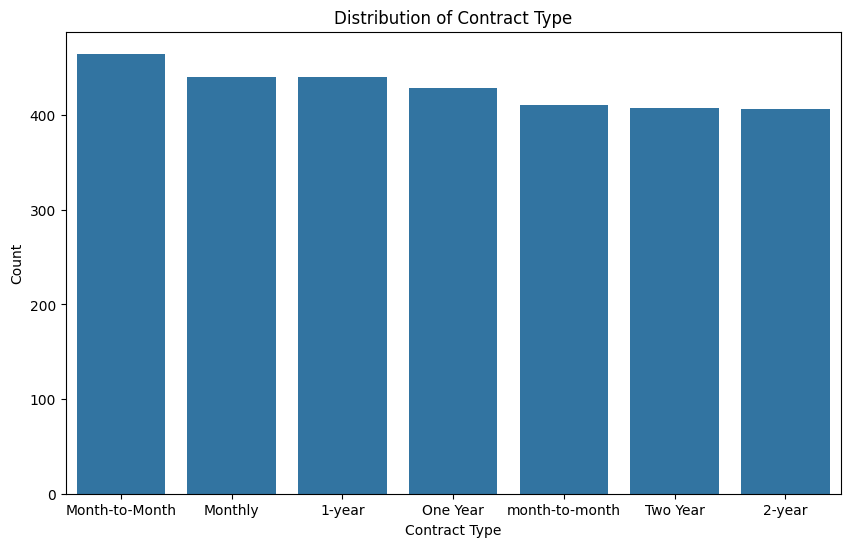

In [254]:
# Plot for categorical variable 'contract_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', order=df['contract_type'].value_counts().index)
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

- The `contract_type` variable contains inconsistent formatting with three variations representing the same value: "Month-to-Month", "Monthly", and "month-to-month". Additionally, "1-year" and "One Year" represent the same contract type, as do "2-year" and "Two Year". These inconsistencies will need to be standardized during data cleaning.

##### Boolean Variables

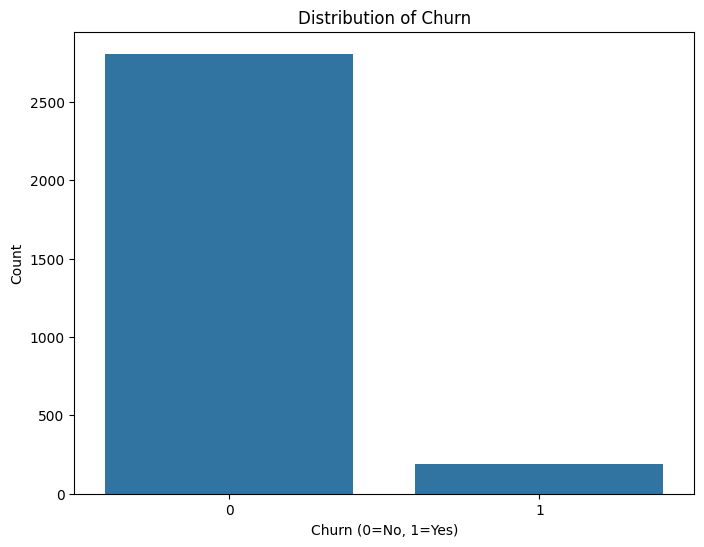

In [255]:
# Plot for binary target 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', order=[0, 1])
plt.title('Distribution of Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

- As indicated earlier in the EDA, the target variable 'churn' is imbalanced, with a significantly lower proportion of churned customers (Class 1) compared to non-churned customers (Class 0). This imbalance needs to be addressed during the modeling phase to ensure the model does not simply predict the majority class and instead learns to identify customers who are likely to churn.

##### Discrete Numeric Variables

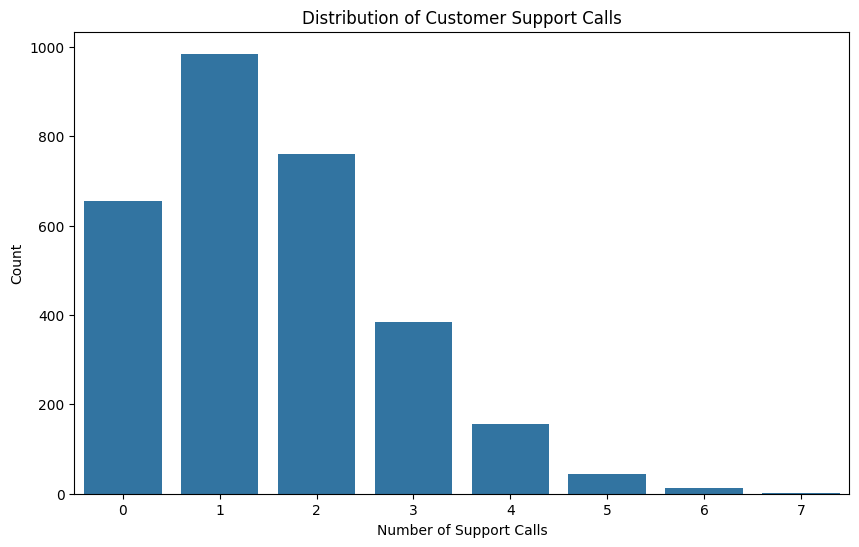

In [256]:
# Plot for discrete numeric variable 'customer_support_calls'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_support_calls', order=sorted(df['customer_support_calls']))
plt.title('Distribution of Customer Support Calls')
plt.xlabel('Number of Support Calls')
plt.ylabel('Count')
plt.show()

- The 'customer_support_calls' variable shows a right-skewed distribution, with most customers making few support calls and a small number making many calls. This suggests that while most customers are satisfied, a subset may be experiencing issues leading to higher call volumes. This variable could be an important predictor of churn, as frequent support calls may indicate dissatisfaction.

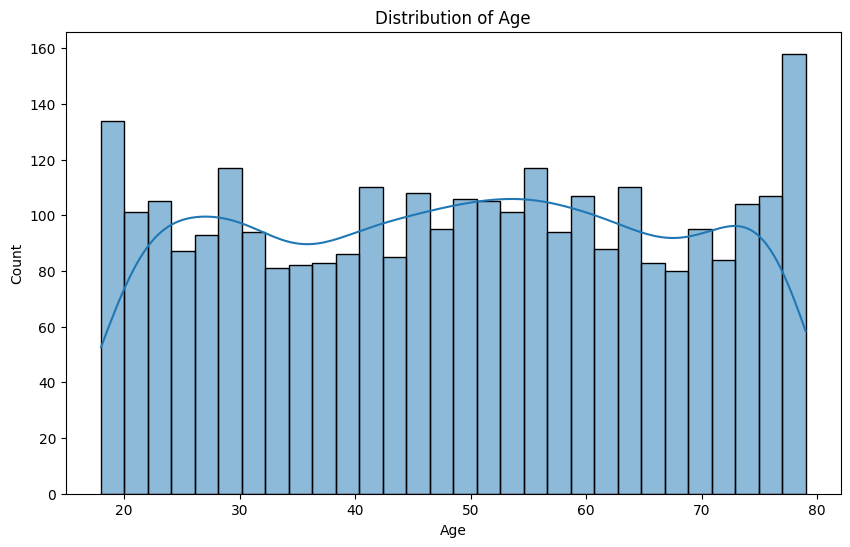

In [257]:
# Plot for discrete numeric variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- 'age' appears to be more uniformly distributed across the age range, with no significant skewness. This suggests a diverse customer base in terms of age, which may influence churn behavior differently across age groups.

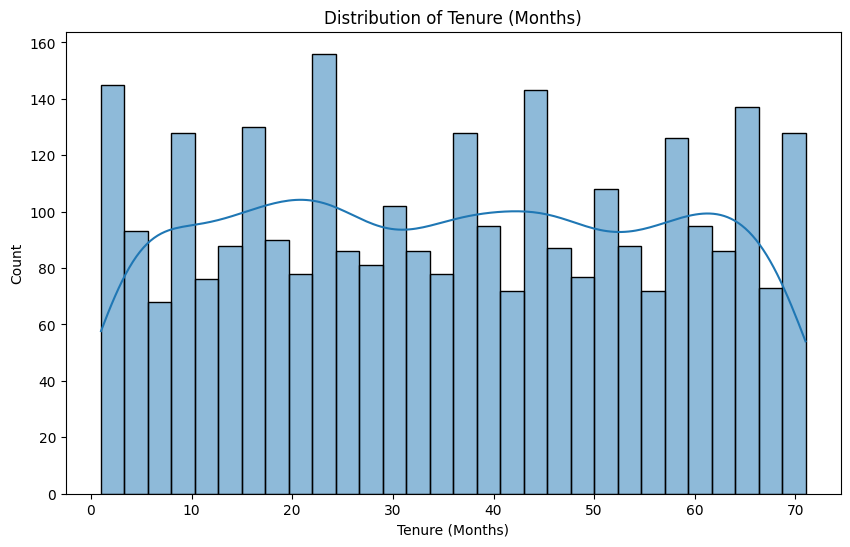

In [258]:
# Plot for discrete numeric variable 'tenure_months'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure_months'], bins=30, kde=True)
plt.title('Distribution of Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

- 'tenure_months' shows a uniform distribution as well, with customers spread across different tenure lengths. This indicates that the customer base includes both new and long-term customers, which may have varying churn rates.

##### Continuous Numeric Variables

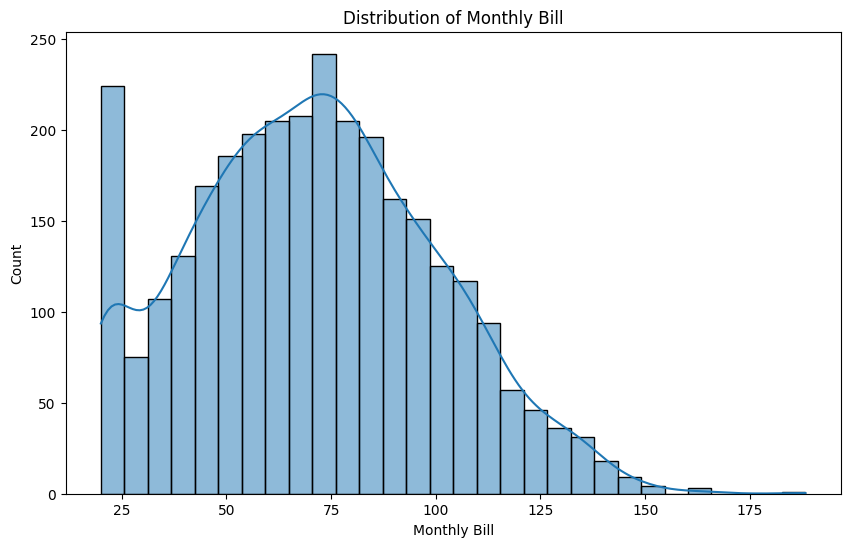

In [259]:
# Plot for continuous numeric variable 'monthly_bill'
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_bill'], bins=30, kde=True)
plt.title('Distribution of Monthly Bill')
plt.xlabel('Monthly Bill')
plt.ylabel('Count')
plt.show()


- 'monthly_bill' appears to follow a normal distribution, centered around the mean of approximately $70, with a standard deviation of $30. This suggests that most customers have monthly bills within a reasonable range, but there are some outliers with significantly higher bills. These outliers may need to be investigated further to understand their impact on churn.

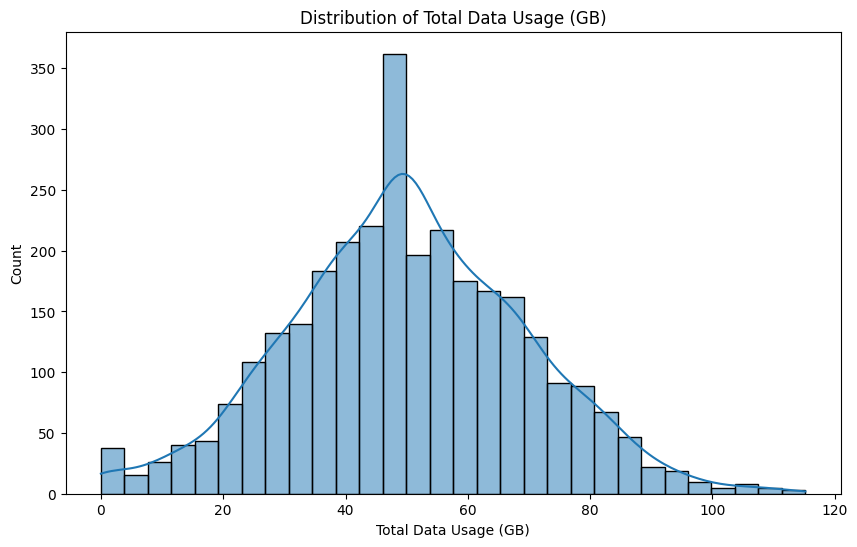

In [260]:
# Plot for continuous numeric variable 'total_data_usage_gb'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_data_usage_gb'], bins=30, kde=True)
plt.title('Distribution of Total Data Usage (GB)')
plt.xlabel('Total Data Usage (GB)')
plt.ylabel('Count')
plt.show()

- 'total_data_usage_gb' also follows a normal distribution, centered around the mean of approximately 50 GB, with a standard deviation of 20 GB. This indicates that most customers have moderate data usage, but there are some with very high or very low usage. Understanding how data usage correlates with churn could provide insights into customer behavior and preferences.

#### **Bivariate Visualizations**

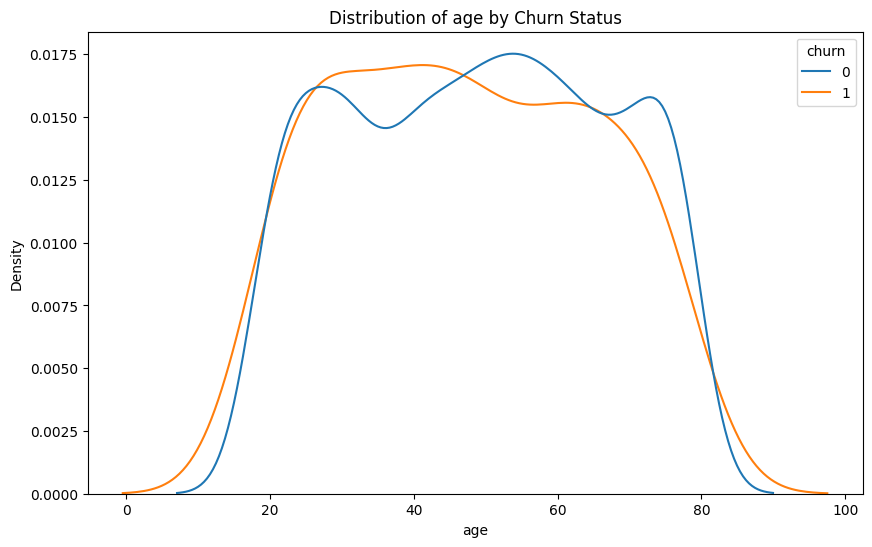

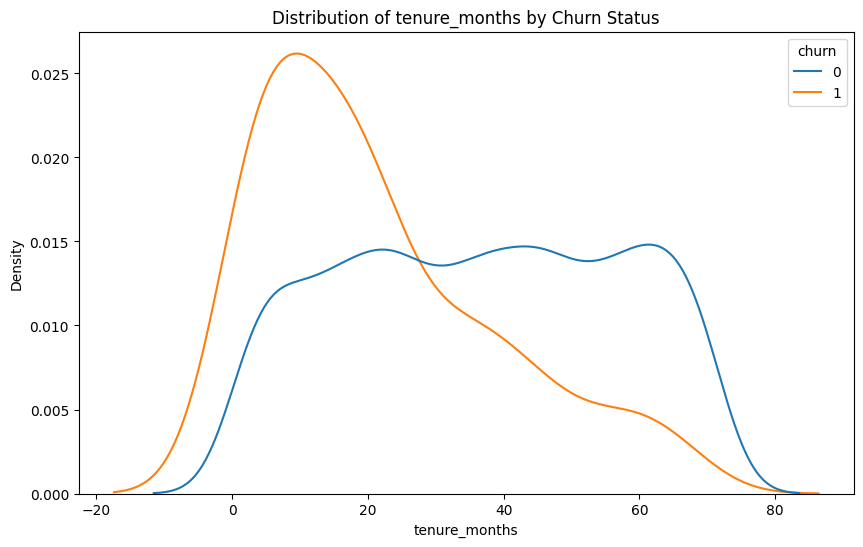

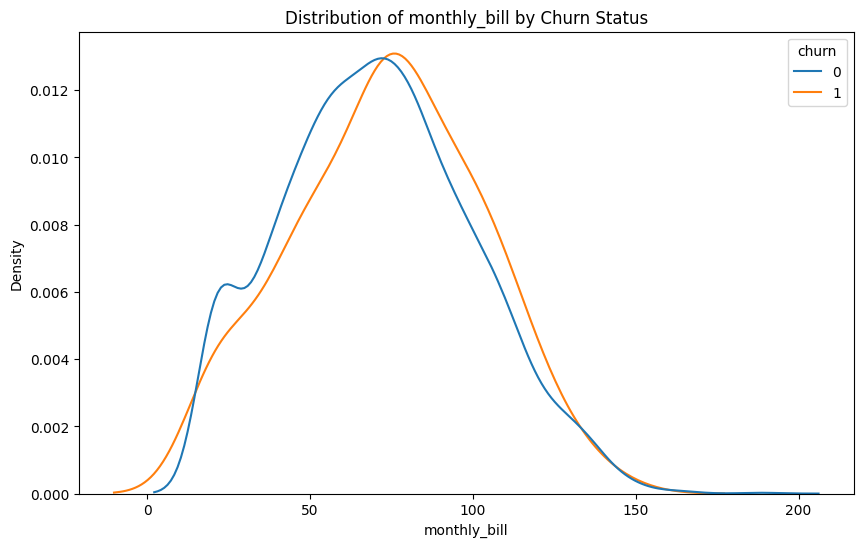

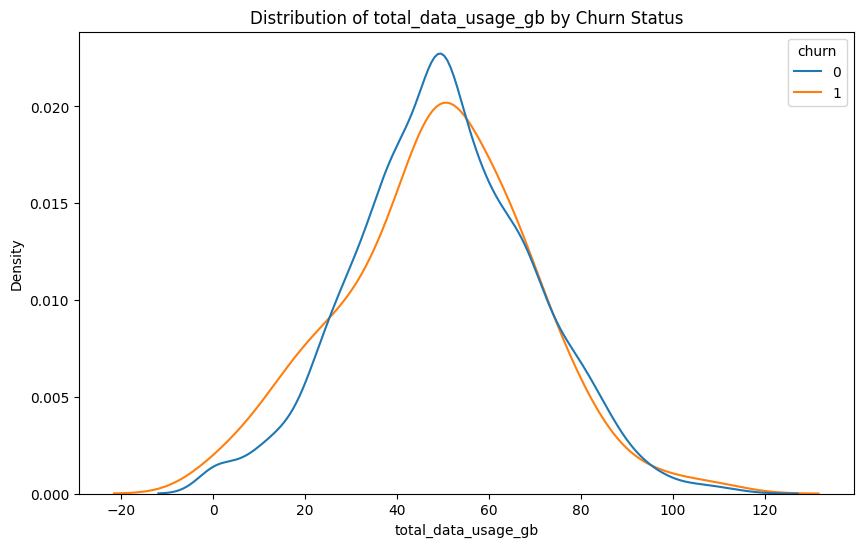

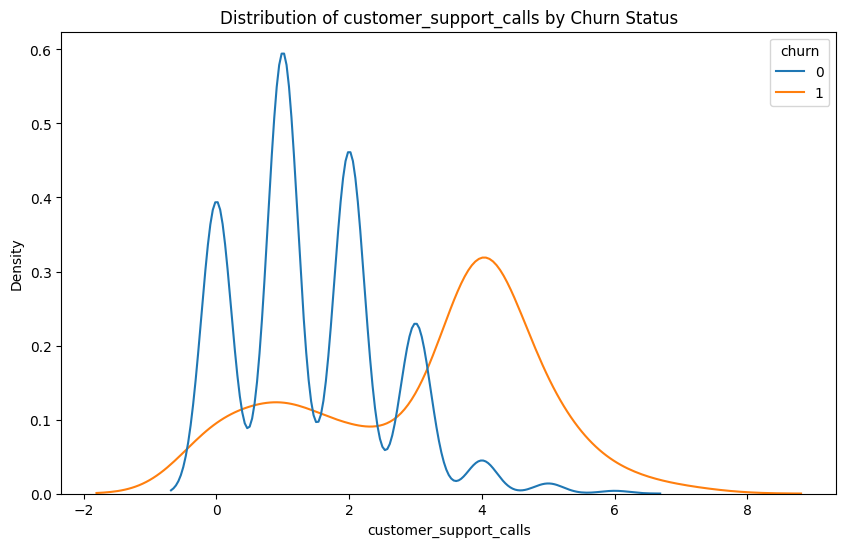

In [261]:
# Compare distributions of numeric features based on churn status
numeric_features = ['age', 'tenure_months', 'monthly_bill', 'total_data_usage_gb', 'customer_support_calls']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='churn', common_norm=False)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

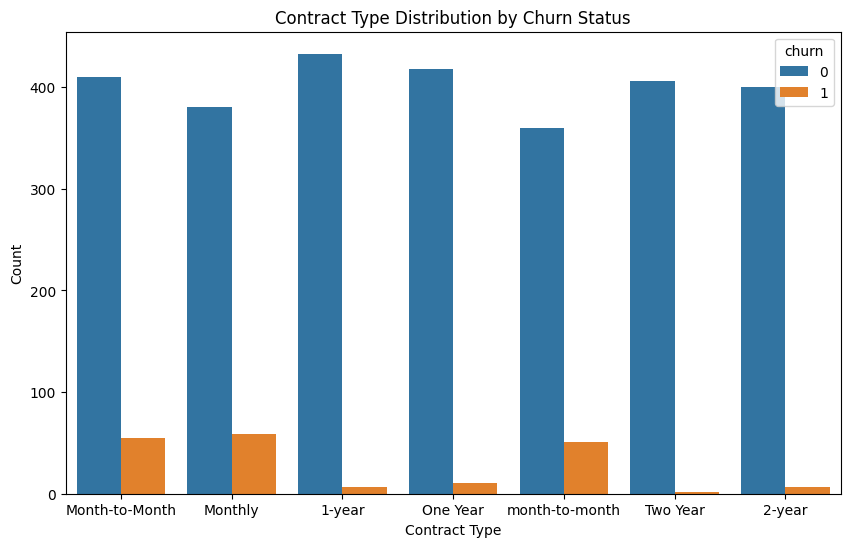

In [262]:
# Compare 'contract_type' across 'churn'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', hue='churn', order=df['contract_type'].value_counts().index)
plt.title('Contract Type Distribution by Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

#### **Multivariate Visualizations**

<Figure size 1200x800 with 0 Axes>

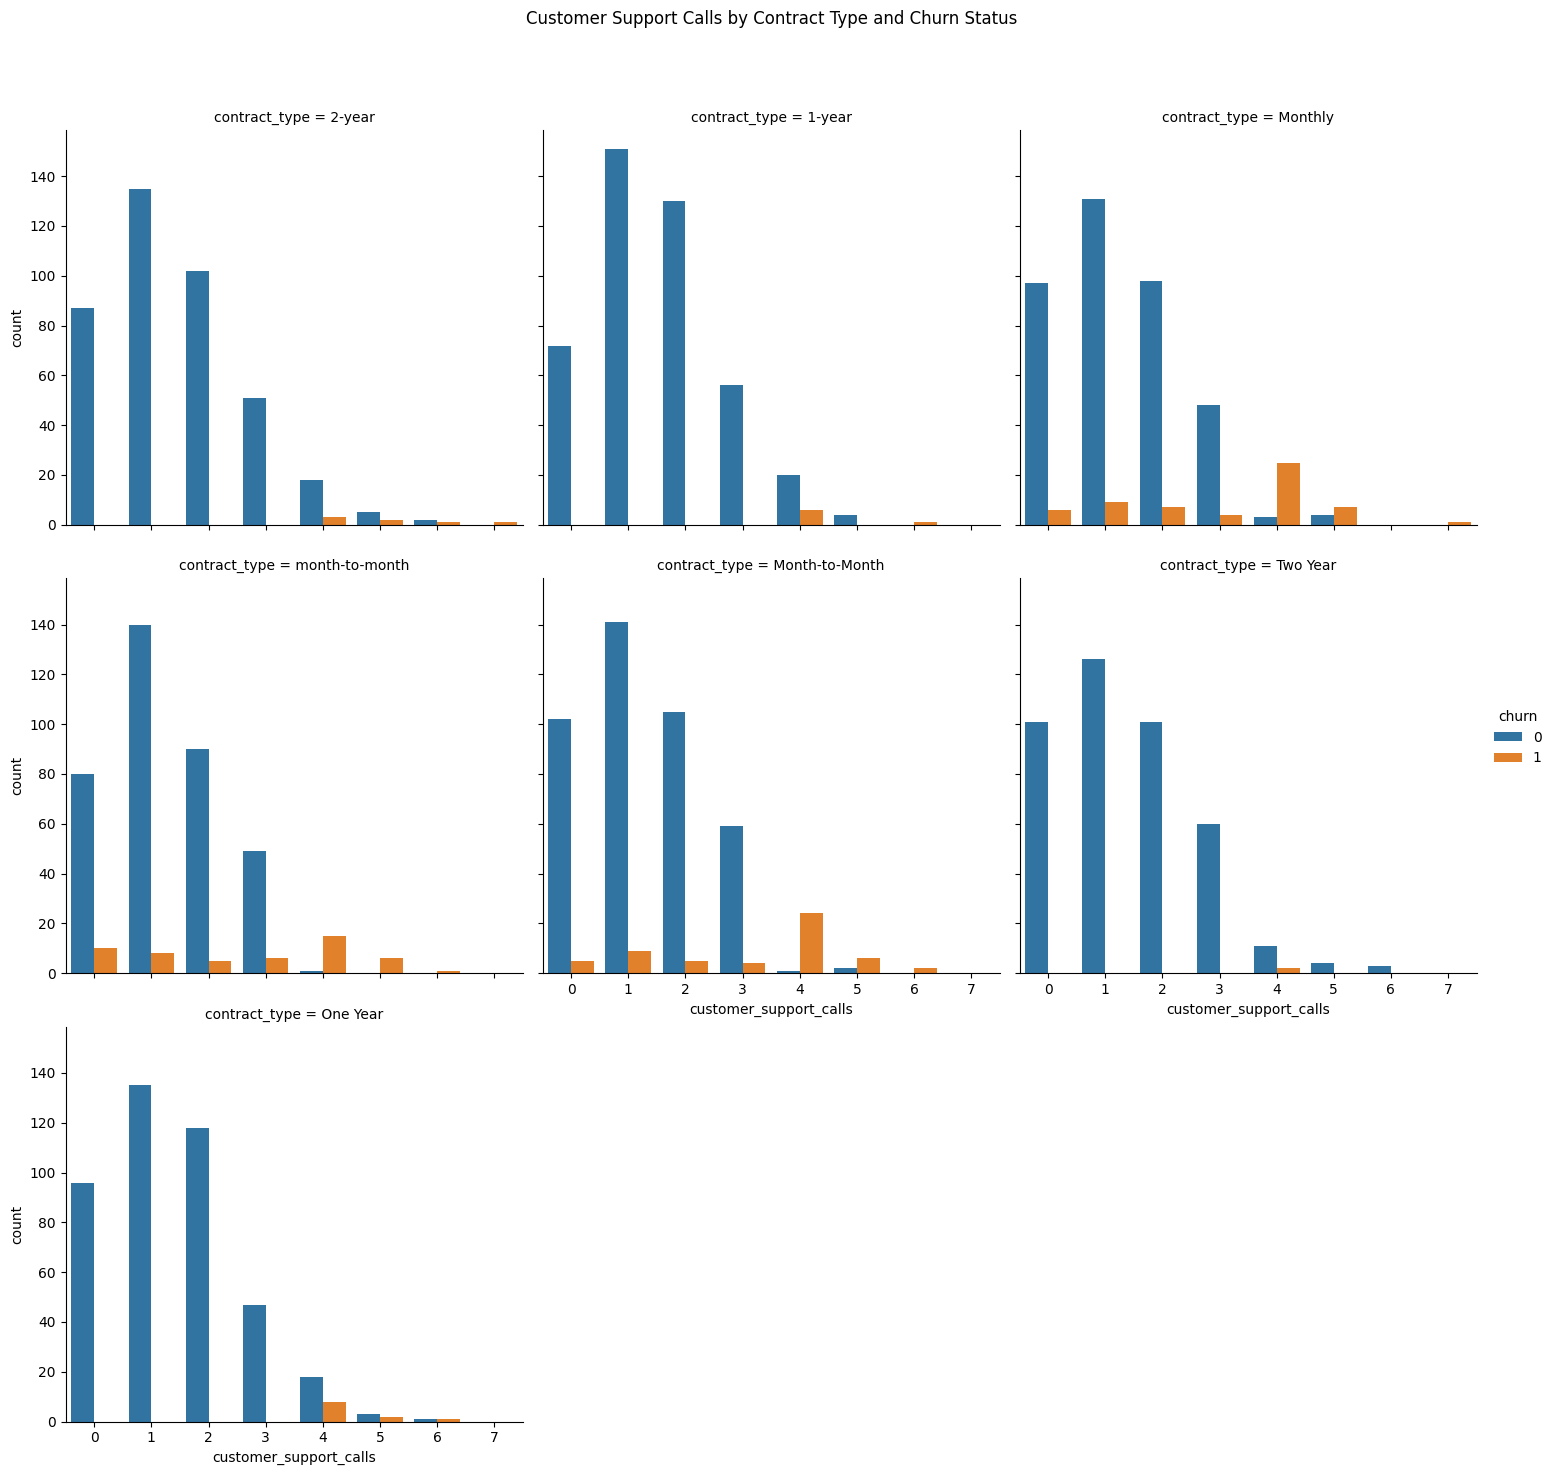

In [263]:
# Compare 'customer_support_calls' and 'contract_type' vs 'churn
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x='customer_support_calls', hue='churn', col='contract_type', kind='count', col_wrap=3)
plt.subplots_adjust(top=0.9)
plt.suptitle('Customer Support Calls by Contract Type and Churn Status')
plt.show()

- It appears that as customer support calls increase, the likelihood of churn also increases, particularly for month-to-month contracts. This suggests that customers with month-to-month contracts who frequently contact customer support may be more dissatisfied and thus more likely to churn. In contrast, customers with longer-term contracts (1-year and 2-year) show a lower churn rate even with higher support calls, indicating that contract type plays a significant role in customer retention.

### **Task 3 (continued). Data Preparation & Feature Engineering**

#### **Task 3b. Standardize Variable Values**
**Purpose:** Clean and standardize categorical variables before feature engineering

**Common Activities:**
- Standardize inconsistent formatting (e.g., "Month-to-Month" → "month_to_month")
- Fix typos and inconsistent casing
- Consolidate similar categories
- Clean string data (strip whitespace, special characters)

In [264]:
# Standardize 'contract_type' values
df['contract_type'] = df['contract_type'].str.lower().replace({
    'month-to-month': 'month_to_month',
    'monthly': 'month_to_month',
    'one year': '1_year',
    '1-year': '1_year',
    'two year': '2_year',
    '2-year': '2_year'
})

In [265]:
# Print standardized values
print("\nStandardized 'contract_type' values:")
print(df['contract_type'].value_counts())


Standardized 'contract_type' values:
contract_type
month_to_month    1316
1_year             869
2_year             815
Name: count, dtype: int64


#### **Task 3c. Feature Engineering**

In [266]:
# Create additional features out of existing ones

# 1. Bill Shock: High bill + low usage (matches churn logic: bill > 100 AND usage < 10)
df['bill_shock'] = ((df['monthly_bill'] > 100) & (df['total_data_usage_gb'] < 10)).astype(int)

# 2. High Support Calls: Threshold at >3 calls (matches churn logic)
df['high_support_calls'] = (df['customer_support_calls'] > 3).astype(int)

# 3. New Customer Risk: Low tenure customers are less loyal
df['new_customer'] = (df['tenure_months'] < 12).astype(int)

# 4. Value Ratio: Cost per GB of data used (high = poor value perception)
df['cost_per_gb'] = df['monthly_bill'] / (df['total_data_usage_gb'] + 1)  # +1 to avoid division by zero

# 5. Tenure Risk Score: Inverse of tenure impact (lower tenure = higher risk)
df['tenure_risk'] = 1 / (df['tenure_months'] + 1)

print("\nNew Features Created:")
print(df[['bill_shock', 'high_support_calls', 'new_customer', 'cost_per_gb', 'tenure_risk']].describe())


New Features Created:
        bill_shock  high_support_calls  new_customer  cost_per_gb  tenure_risk
count  3000.000000         3000.000000   3000.000000  3000.000000  3000.000000
mean      0.003333            0.071333      0.156333     2.382560     0.056670
std       0.057648            0.257424      0.363232     7.530221     0.082785
min       0.000000            0.000000      0.000000     0.196089     0.013889
25%       0.000000            0.000000      0.000000     0.904680     0.018182
50%       0.000000            0.000000      0.000000     1.377692     0.027027
75%       0.000000            0.000000      0.000000     2.037971     0.052632
max       1.000000            1.000000      1.000000   130.154287     0.500000


#### **Task 3c. First Iteration of Feature Selection**

#### **Task 3d. Investigate Features Further (Optional)**

#### **Task 3e. Outliers**

Outliers can have varying impacts depending on the modeling approach. Always visualize and assess outliers before modeling. Consider robust methods or transformations if outliers are present.

| Model               | Importance of Handling Outliers | Why?                                                                                                                                                                                                 |
|---------------------|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT) | Low                             | Decision Trees split data based on thresholds, making them inherently robust to outliers. Extreme outliers may slightly influence split thresholds, especially in shallow trees.                    |
| Random Forests (RF) | Low to Moderate                 | Random Forests average predictions across multiple trees, reducing the influence of outliers. Consistent outliers across samples may slightly affect feature importance rankings.                   |
| Linear Regression   | High                            | Outliers can disproportionately influence the regression line, distorting coefficients and residuals, leading to poor model performance and interpretability.                                      |
| Logistic Regression | Moderate to High                | Outliers can affect the decision boundary, especially if they dominate the feature space. The sigmoid function reduces sensitivity, but extreme outliers can still skew predictions.               |
| XGBoost             | Moderate                        | XGBoost is generally robust to outliers due to its tree-based nature and regularization. However, dominant outliers can influence split thresholds and feature importance, especially early on.     |
| Statistical Testing | High                            | Outliers can strongly affect tests (t-tests, ANOVA, correlation) by inflating variance and distorting means. Non-parametric tests (e.g., Mann-Whitney U, Wilcoxon) are less sensitive. Always check for outliers and consider robust alternatives if needed. |

**Tip:**  
- Use boxplots or histograms to visually inspect outliers.
- Consider winsorizing, transformation, or robust models if outliers are problematic.

##### **Check for Outliers**

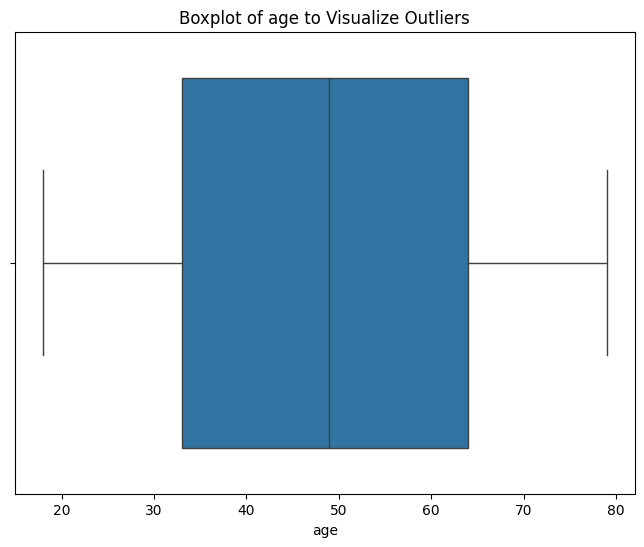

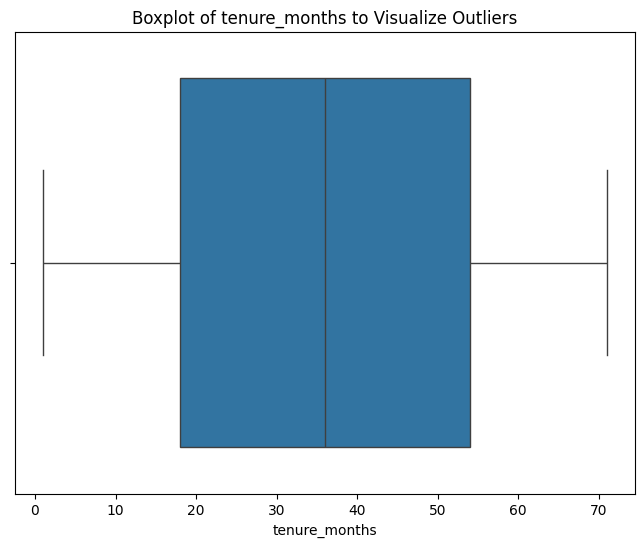

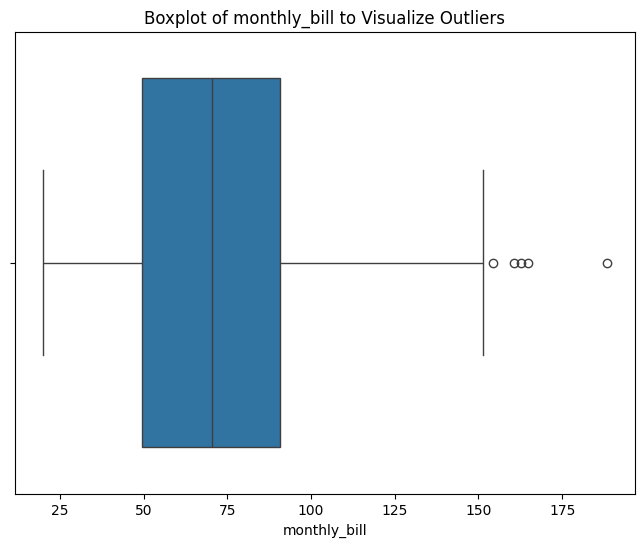

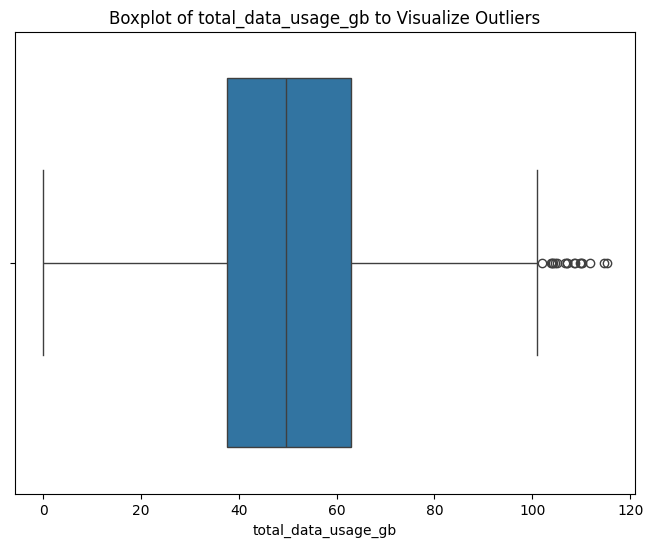

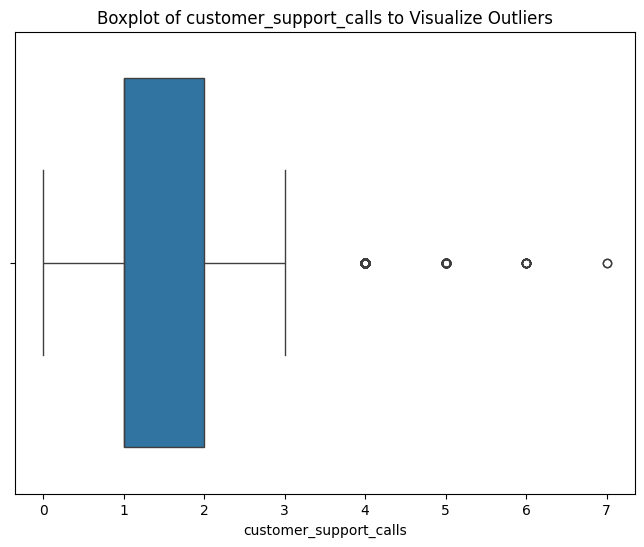

In [267]:
# Check for outliers in numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature} to Visualize Outliers')
    plt.xlabel(feature)
    plt.show()


##### **Manage Outliers with IQR Method**

In [268]:
# # Cap outliers with the IQR method
# for feature in numeric_features:
#     Q1 = df[feature].quantile(0.15)
#     Q3 = df[feature].quantile(0.85)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[feature] = np.where(df[feature] < lower_bound, lower_bound,
#                            np.where(df[feature] > upper_bound, upper_bound, df[feature]))
#     print(f"\nCapped outliers in {feature}:")
#     print(df[feature].describe())

#### **Task 3f. Check Assumptions (Data-Level)**

These checks are performed **before modeling** to:
- Validate suitability for statistical tests (t-tests, ANOVA, correlation)
- Guide data transformations and preprocessing
- Inform feature selection decisions

**Note:** For predictive models, model-specific assumptions (linearity, homoscedasticity of residuals, normality of residuals) are checked **after** model development in Task 4b using residual diagnostics.

##### **Normality**

##### Continuous Numeric Variables

##### Discrete Numeric Variables

##### **Homogeneity of Variance** *(Equal Variance)*

##### **Independence**

##### Testing for independence between variables and observations

##### **Sample Size**

In [269]:
# Check that sample size is sufficient for analysis
n_rows, n_cols = df.shape
print(f"\nDataset contains {n_rows} rows and {n_cols} columns.")


Dataset contains 3000 rows and 13 columns.


#### **Task 3g. Statistical Testing**

**Null Hypothesis (H₀):** There is no statistically significant difference in price between cars with and without an accident history.

**Alternative Hypothesis (Hₐ):** There is a statistically significant difference in price between cars with and without an accident history.

##### **Statistical Testing Metrics Reference** 📊

- **P-value:** Probability of observing results as extreme as those measured, assuming the null hypothesis is true (commonly, < 0.05 indicates statistical significance).
- **Z-statistic:** Standardized value showing how many standard deviations a sample mean is from the population mean; used for large samples or when population variance is known.
- **T-statistic:** Measures the difference between group means relative to sample variability; used for smaller samples or when population variance is unknown.
- **Effect Size (Cohen's d):** Quantifies the magnitude of the difference between groups, regardless of sample size.
  - Small: 0.2, Medium: 0.5, Large: 0.8
- **Confidence Interval:** Range of values within which the true population parameter is likely to fall, with a given level of confidence (e.g., 95%).
- **Statistical Power:** Probability that a test will detect a true effect when it exists (aim for 80%+ to reduce risk of Type II error).

*Tip: Always report both statistical significance (p-value) and practical significance (effect size/confidence interval) for context.*

##### **Run Statistical Tests**

##### **Check Statistical Significance of Numeric, Binary and Categorical Features**

| Method                        | Description                                                                 | Importance for Decision Trees (DT) | Importance for Random Forests (RF) | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost | Why?                                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------|------------------------------------|------------------------------------|-----------------------------------|-------------------------------------|-------------------------|-------------------------------------------------------------------------------------------------------|
| Statistical Significance Tests | Evaluates the relationship between individual features and the target variable (e.g., t-tests, chi-square). | Low                                | Low to Moderate                   | High                              | High                                | Low to Moderate         | Essential for regression models to identify predictive features. For tree-based models, less critical due to built-in feature selection, but can help with interpretability and initial screening. |

##### **Check Statistical Significance of Features for Modeling**

In [270]:
# Check statistical significance of independent variables compared to dependent variable price to determine which can be dropped prior to modeling.
significant_features = []
for feature in df.columns:
    if feature != 'churn' and feature != 'customer_id':
        if df[feature].dtype in ['int64', 'float64']:
            # Numeric feature: t-test
            churned = df[df['churn'] == 1][feature]
            not_churned = df[df['churn'] == 0][feature]
            t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)
        else:
            # Categorical feature: chi-squared test
            contingency_table = pd.crosstab(df[feature], df['churn'])
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        
        if p_value < 0.05:
            significant_features.append(feature)
            print(f"Feature '{feature}' is significant (p-value: {p_value:.4f})")
        else:
            print(f"Feature '{feature}' is NOT significant (p-value: {p_value:.4f})")

Feature 'age' is NOT significant (p-value: 0.6290)
Feature 'tenure_months' is significant (p-value: 0.0000)
Feature 'monthly_bill' is NOT significant (p-value: 0.1552)
Feature 'total_data_usage_gb' is NOT significant (p-value: 0.3421)
Feature 'customer_support_calls' is significant (p-value: 0.0000)
Feature 'contract_type' is significant (p-value: 0.0000)
Feature 'bill_shock' is NOT significant (p-value: 0.3087)
Feature 'high_support_calls' is significant (p-value: 0.0000)
Feature 'new_customer' is significant (p-value: 0.0000)
Feature 'cost_per_gb' is NOT significant (p-value: 0.2879)
Feature 'tenure_risk' is significant (p-value: 0.0000)


##### **Remove Statistically Insignificant Variables**

#### **Task 3h. Variable Skewness**

| Model                | Importance of Handling Skewness | Why?                                                                                                   |
|----------------------|---------------------------------|--------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Low                             | Decision Trees split data by thresholds and are robust to skewed distributions. Extreme skewness may cause imbalanced splits or affect interpretability. |
| Random Forests (RF)  | Low                             | Random Forests inherit robustness from Decision Trees. Severe skewness is rarely problematic but can occasionally contribute to overfitting or biased feature importance. |
| Linear Regression    | High                            | Linear Regression is sensitive to skewed features, which can distort coefficients and residuals. Transformations (e.g., log, Box-Cox) are often necessary for valid inference. |
| Logistic Regression  | High                            | Logistic Regression assumes linearity in the logit; skewed features can reduce model accuracy and interpretability. Transformations are recommended. |
| XGBoost              | Moderate                        | XGBoost is robust to skewness due to its tree-based nature, but highly skewed features can influence split thresholds or dominate feature importance. Transformations may improve results. |

##### **Check Variable Skewness**

In [271]:
# Check skewness of all numeric variables.
for feature in df.select_dtypes(include=[np.number]).columns:
    if feature not in ['customer_id', 'churn']:
        skewness = df[feature].skew()
        if abs(skewness) > 0.75:
            print(f"\n{feature} is highly skewed (skewness: {skewness}). Consider transformation.")


customer_support_calls is highly skewed (skewness: 0.7766334220501312). Consider transformation.

bill_shock is highly skewed (skewness: 17.242407373949813). Consider transformation.

high_support_calls is highly skewed (skewness: 3.3326580380389923). Consider transformation.

new_customer is highly skewed (skewness: 1.8935352691490788). Consider transformation.

cost_per_gb is highly skewed (skewness: 11.247362218101129). Consider transformation.

tenure_risk is highly skewed (skewness: 3.6740214295006552). Consider transformation.


- It appears there is moderate skew in the 'customer_support_calls' variable, with a longer tail on the right side of the distribution. Since tree-based models will be primarily used, this skewness is less concerning, but it may still be beneficial to consider transformations or robust modeling techniques if performance issues arise.

##### **Manage Variable Skewness**

In [272]:
# # Manage variable skewness for highly skewed variables over 0.75.
# for feature in df.select_dtypes(include=[np.number]).columns:
#     if feature not in ['customer_id', 'churn']:
#         skewness = df[feature].skew()
#         if abs(skewness) > 0.75:
#             df[feature] = np.log1p(df[feature])
#             print(f"Applied log transformation to {feature} to reduce skewness from {skewness}.")

#### **Task 3i. Encode Features**

In [273]:
# Encode categorical variables for modeling
df = pd.get_dummies(df, columns=['contract_type'], drop_first=True, dtype=int)

In [274]:
# Print dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())


Dataset after preprocessing:
   customer_id  age  tenure_months  monthly_bill  total_data_usage_gb  \
0         1001   19             42     45.422406            28.050591   
1         1002   53             41     78.016864            55.702603   
2         1003   75              4     67.011073            74.798731   
3         1004   58             51     43.303750            39.913597   
4         1005   27             43    104.898819            78.216551   

   customer_support_calls  churn  bill_shock  high_support_calls  \
0                       1      0           0                   0   
1                       2      0           0                   0   
2                       1      0           0                   0   
3                       1      0           0                   0   
4                       1      0           0                   0   

   new_customer  cost_per_gb  tenure_risk  contract_type_2_year  \
0             0     1.563562     0.023256              

#### **Task 3j. Remove Highly Correlated Features (Correlation Heatmaps & VIF)**

| Model Type           | Importance | Why?                                                                                                                                                                                                  |
|----------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees       | Moderate   | Decision Trees are not sensitive to multicollinearity for prediction, but correlated features can affect feature importance rankings, which matters for interpretation and feature selection.           |
| Random Forests       | Low        | Random Forests are robust to multicollinearity, but correlated features may still bias feature importance scores. Consider removing highly correlated features if interpretability is important.      |
| Linear Regression    | High       | Multicollinearity causes unstable coefficients, inflated standard errors, and unreliable interpretations. VIF is critical for diagnosing and addressing this issue.                                   |
| Logistic Regression  | High       | Like linear regression, logistic regression is sensitive to multicollinearity, leading to unstable coefficients and interpretability challenges. VIF is an important diagnostic tool.                 |
| XGBoost              | Low        | XGBoost is generally robust to multicollinearity due to tree-based splits and built-in regularization (L1/L2). Correlated features may affect feature importance but rarely degrade predictive power. |

**Notes:**
1. For tree-based models, multicollinearity does not harm predictive performance but can bias feature importance, which is relevant for interpretation.
2. For regression models, always check VIF and remove/reduce highly correlated features.
3. For XGBoost, regularization helps, but review feature importance for interpretability.

##### **Check for Multicollinearity with Correlation Heatmaps**

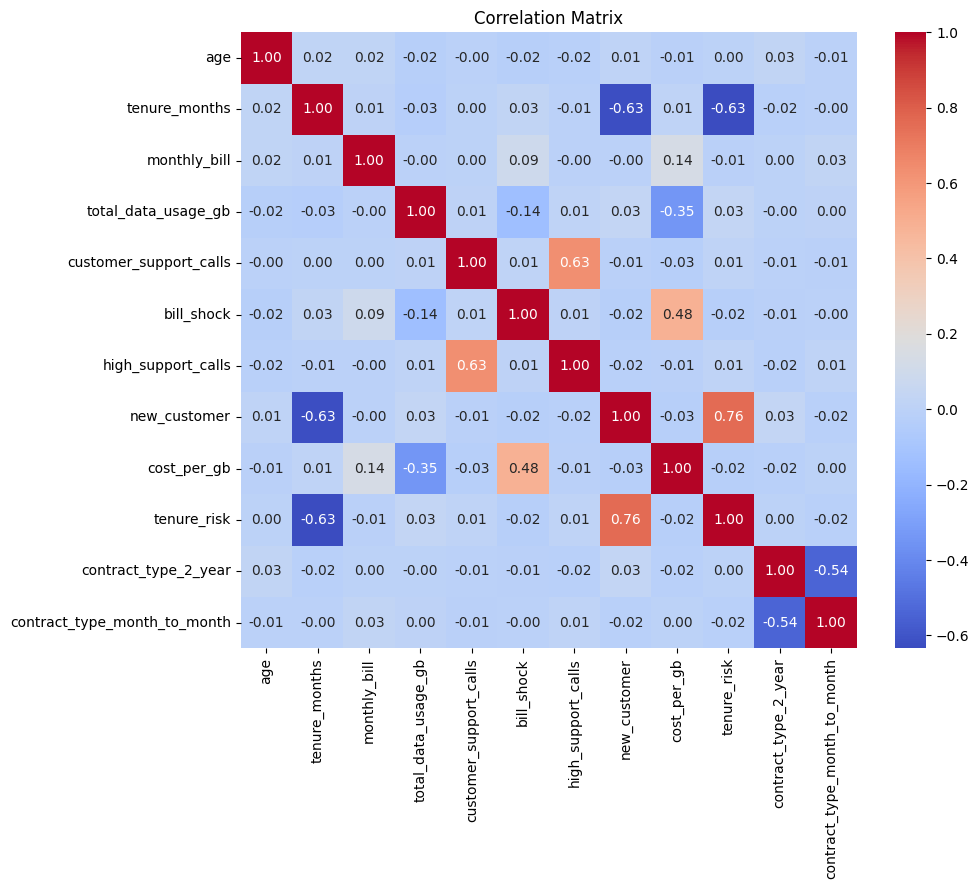

In [275]:
# Check for multicollinearity among independent variables with a correlation matrix plot.
plt.figure(figsize=(10, 8))
corr_matrix = df.drop(columns=['customer_id', 'churn']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

##### **Check For Multicollinearity (VIF)**

In [276]:
# Check for multicollinearity with VIF.
X = df.drop(columns=['customer_id', 'churn'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
                         feature       VIF
0                            age  6.805129
1                  tenure_months  5.595271
2                   monthly_bill  6.143927
3            total_data_usage_gb  6.645544
4         customer_support_calls  3.994984
5                     bill_shock  1.313208
6             high_support_calls  1.775572
7                   new_customer  3.072862
8                    cost_per_gb  1.571078
9                    tenure_risk  3.656763
10          contract_type_2_year  1.853972
11  contract_type_month_to_month  2.367896


##### **Remove Highly Correlated Features**

---
### ***End of Analyze Section Insights***
- What are the most important data quality or distribution issues discovered?
    - Missing values in total_data_usage_gb, outliers in monthly_bill, skewness in customer_support_calls and class imbalance in the churn variable.
- What features or variables require special attention in the next stage?
    - Contract type standardization, handling class imbalance, and addressing outliers in monthly_bill. Not entirely necessary to remove outliers for tree-based models, but worth monitoring.
- What is your plan for feature selection or engineering?
    - After initial model development, feature importance analysis will guide further feature selection and engineering.
- How did handling missing values, outliers, or skewness affect the dataset?
    - Addressing missing values improved data completeness, outlier management would reduce noise, and skewness adjustments would enhance feature distributions for modeling, but were not strictly necessary for tree-based models.
- Are there any features that may introduce bias or ethical concerns?
    - At this point in time, it doesn't appear that any features may introduce bias or ethical concerns.
- What limitations remain in the data after cleaning and transformation?
    - Although data quality has improved, and the remaining features indicate readiness for modeling, the class imbalance in the target variable remains a challenge that needs to be addressed during model training.
- What assumptions have you made during EDA that should be revisited later?
    - Assumptions regarding the normality of certain features and the independence of observations should be revisited during model diagnostics.
- What additional data or context would improve the analysis?
    - Once the first model is built, feature importance analysis may indicate areas where additional data could enhance predictive power.
- What modeling challenges do you anticipate based on your EDA findings?
    - Class imbalance may lead to biased predictions if not properly addressed through resampling techniques or class weighting.
- Are there specific features or data transformations that may require special handling in the modeling phase?
    - Contract type standardization was applied. It may be necessary to monitor the impact of outliers on monthly_bill during modeling.
- What criteria will you use to evaluate feature selection and model performance?
    - F1-Score for classification models, particularly focusing on the minority class (churned customers). After initial modeling, feature importance and model interpretability will also be considered.
- How will your EDA findings influence your choice of modeling techniques?
    - The presence of class imbalance suggests that models robust to imbalance (e.g., Random Forest with class weighting, XGBoost with scale_pos_weight) will be prioritized.
- Are there any features you expect to be especially predictive or problematic for modeling?
    - Customer support calls and contract type are expected to be predictive. Class imbalance may pose challenges for accurate minority class prediction.
- What steps will you take if initial models do not perform as expected?
    - Revisit feature engineering, consider additional data transformations, and explore alternative modeling techniques or hyperparameter tuning.

#### **Save Analysis-Ready Dataset**

**Checkpoint:** Save your fully prepared dataset with all transformations, feature engineering, and cleaning applied. This dataset is ready for modeling.

**Recommended naming:** `{project_name}_analysis_ready.csv` or `.pkl`

In [277]:
# Save the dataset.
df.to_csv('telecom_churn_prediction.csv', index=False)

---
### **Transition to Construct**

With your data prepared and features selected, proceed to model development, validation, and post-model assumption testing.

**✅ Before proceeding, ensure you have:**
- ✓ Completed data cleaning (missing values, duplicates, outliers handled)
- ✓ Performed comprehensive EDA with visualizations
- ✓ Engineered and selected relevant features
- ✓ Checked statistical assumptions and conducted tests
- ✓ Addressed class imbalance if applicable
- ✓ Saved analysis-ready dataset

**📋 Deliverables from Analyze stage:**
- Clean, transformed dataset ready for modeling
- EDA insights and patterns documented
- Statistical test results (if applicable)
- Feature engineering rationale
- List of features selected for modeling

<img src="images/Construct.png" width="75" height="75" align=left>

## **paCe: Construct**

#### **Questions to reflect on during the Construct stage** 💭
**Data & Model Diagnostics**
- Do you observe anything unusual?
- Have all the assumptions been met?
- How well does the model fit the data?
- How will you validate model performance (e.g., cross-validation, test set)?
- What criteria will you use to determine if the model is successful?

**Feature Selection & Rationale**
- Which independent variables did you select for the model, and what was your rationale?
- Are there any features or data transformations that require special handling in modeling?

**Model Improvement & Iteration**
- Can the model be improved? Are there any changes you would make?

**Resources & References**
- What resources did you consult during this stage? (Please include links.)

**Ethics & Responsible AI**
- Are there any ethical considerations at this stage?

### **Task 4. Model Development**

#### **Task 4a. Prepare Data for Modeling**

**Key Activities:**
- Define features (X) and target variable (y)
- Split data into training and test sets
- Set up cross-validation strategy
- Apply feature scaling/normalization if needed (for regression models)
- Handle any remaining data preparation specific to modeling

**Best Practices:**
- Use stratified split for classification to preserve class distribution
- Typical split: 70-80% training, 20-30% test
- Set random_state for reproducibility
- Ensure no data leakage (fit transformations only on training data)

**Note:** For tree-based models (DT, RF, XGBoost), feature scaling is not required.

##### **Split Data into Training and Test Sets**

In [278]:
# Split the data into training and testing sets
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

##### **Manage Class Imbalance (if applicable)**

Class imbalance is handled **within each model's development section** using one of these approaches:

| Approach | Best For | Implementation |
|----------|----------|----------------|
| `class_weight='balanced'` | Random Forest, Logistic Regression | Built-in parameter |
| `scale_pos_weight` | XGBoost | Built-in parameter |
| SMOTE Pipeline | Any model | Use `imblearn.Pipeline` within model cell |

**Note:** Choose ONE approach per model. Using both class weighting AND SMOTE can over-correct.

#### **Model Selection Guidance** 🎯

**Quick Model Selection Guide:**

| Issue                   | Linear/Logistic Regression                | Tree-Based Models (DT/RF/XGBoost)           |
|-------------------------|-------------------------------------------|---------------------------------------------|
| **Multicollinearity**   | ⚠️ **Critical** – Remove correlated features | ✅ **Low impact** – Models handle naturally  |
| **Feature Scaling**     | ⚠️ **Required** – Standardize features      | ✅ **Not needed** – Tree splits are scale-invariant |
| **Missing Values**      | ⚠️ **Must handle** – Impute before modeling | 🔶 **Some tolerance** – XGBoost handles natively |
| **Outliers**            | ⚠️ **Sensitive** – Consider removal/transformation | ✅ **Robust** – Tree splits minimize impact  |
| **Feature Interactions**| ⚠️ **Manual** – Must engineer interactions | ✅ **Automatic** – Naturally captures interactions |
| **Interpretability**    | ✅ **High** – Clear coefficient interpretation | 🔶 **Medium** – Feature importance available |

**Choose Linear/Logistic when:** You need high interpretability and have clean, well-prepared data.

**Choose Tree-based when:** You want robustness, automatic feature handling, and strong predictive performance.

*Tip: Consider your business objectives, data quality, and need for interpretability when selecting a model.*

#### **Task 4b. Build and Iterate Models**

**Key Activities:**
- Select appropriate modeling techniques based on data characteristics and business objectives
- Build and tune initial models using cross-validation and hyperparameter optimization
- Check model assumptions and diagnose potential issues (e.g., overfitting, multicollinearity, class imbalance)
- Evaluate model performance using relevant metrics (e.g., accuracy, recall, AUC, F1-score)
- Iterate on feature selection and model parameters to improve performance

##### **Model Evaluation Metrics Reference** 📊

**For Classification Models:**
- **AUC (ROC-AUC):** Area under the ROC curve; measures ability to distinguish classes (higher = better).
- **Precision:** Proportion of predicted positives that are actual positives (focuses on false positives).
- **Recall (Sensitivity):** Proportion of actual positives correctly identified (focuses on false negatives).
- **Accuracy:** Proportion of all predictions that are correct (can be misleading with imbalanced classes).
- **F1-score:** Harmonic mean of precision and recall; balances false positives and false negatives.
- **Confusion Matrix:** Table showing counts of true positives, false positives, true negatives, and false negatives.

**For Regression Models:**
- **RMSE (Root Mean Squared Error):** Square root of average squared differences between predicted and actual values (penalizes large errors).
- **MAE (Mean Absolute Error):** Average absolute differences between predicted and actual values (less sensitive to outliers).
- **R² (Coefficient of Determination):** Proportion of variance in dependent variable explained by model.
- **Adjusted R²:** R² adjusted for number of predictors; penalizes unnecessary complexity.

*Tip: Always select metrics that align with your business objectives and the problem context (e.g., use recall for churn prediction if missing a churned client is costly).*

##### **Linear Regression**

##### Build the Model

##### Model Evaluation

##### Test Model Assumptions 📊

After developing your linear regression model, check the following assumptions:

**Linearity & Homoscedasticity** (combined check)
- Residuals should scatter randomly around zero with consistent spread
- *Check with residual vs. fitted value plots*

**Independence of Residuals**
- Residuals are independent (no autocorrelation)
- *Test with autocorrelation plot or Durbin-Watson statistic*

**Normality of Residuals**
- Residuals are approximately normally distributed
- *Assess with Q-Q plots or Shapiro-Wilk test*

**No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

*Tip: Violations may require data transformation, feature engineering, or alternative modeling approaches.*

##### **Logistic Regression**

##### Build the Model

##### Model Evaluation

##### Test Model Assumptions 📊

After developing your logistic regression model, check the following assumptions:

**1. Linearity of the Logit**
- Predictors have a linear relationship with the log odds of the outcome
- *Check with Box-Tidwell test or by plotting predictor vs. logit*

**2. Independence of Observations**
- Observations are independent of each other (no clustering or autocorrelation)
- *Consider data collection method and temporal dependencies*

**3. No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

**4. No Extreme Outliers or Influential Points**
- Outliers do not unduly influence the model
- *Assess with Cook's distance, leverage plots, and standardized residuals*

**5. Large Sample Size**
- Sufficient data for stable coefficient estimates
- *Rule of thumb: ≥10-15 events per predictor variable for each outcome class*

**6. Binary or Ordinal Outcome**
- Dependent variable must be binary (or ordinal for ordinal logistic regression)
- *Verify target variable has exactly 2 classes*

*Tip: Violations may require data transformation, removing influential observations, regularization (L1/L2), or alternative modeling approaches.*

##### **Decision Tree**

##### Build the Model


##### Model Evaluation

##### Save Model Iteration Scores

##### Generate SHAP Values for Feature Importance


| **Aspect**              | **Description**                                                                                           | **How to Read in SHAP Plot**                                                                                   |
|-------------------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| **Feature Ranking**     | Features are ordered by overall impact on model predictions.                                              | Top features are most influential; read from top to bottom.                                                     |
| **SHAP Value (X-axis)** | Amount each feature value increases or decreases the prediction for each sample.                          | Dots left of center lower prediction; dots right of center raise prediction.                                    |
| **Color Gradient**      | Shows the original feature value for each sample.                                                         | Blue = low value, Red/Pink = high value.                                                                        |
| **Spread**              | Shows how much feature impact varies across samples.                                                      | Wide spread = strong/variable effect; tight cluster = less impact.                                              |
| **Direction**           | Indicates if high or low feature values drive predictions up or down.                                     | If red dots are mostly right, high values increase prediction; if left, high values decrease prediction.        |
| **Summary**             | Identifies which features matter most and how they influence predictions.                                 | Use plot to explain model behavior and feature effects to stakeholders.                                         |

**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌳

After developing your decision tree model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits and avoid overfitting
- *Ensure each terminal node has sufficient observations (min_samples_leaf)*

**2. Feature Relevance**
- Important features are included; irrelevant features may reduce performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training data rather than learn patterns
- *Use cross-validation, prune tree, or limit max_depth and min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias splits toward majority class
- *Use class_weight='balanced', SMOTE, or stratified sampling*

**5. No Multicollinearity Requirement**
- Trees handle correlated features naturally
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically and validate with domain knowledge*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Decision Trees:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

##### **Random Forest**

##### Buld the Model

In [289]:
# Balanced parameter grid - between previous attempts
param_grid_rf = {
    'n_estimators': [150, 200],
    'max_depth': [8, 10, 12],             # Slightly deeper than 5-7
    'min_samples_split': [10, 15, 20],    # Slightly less strict
    'min_samples_leaf': [3, 5, 8],        # Slightly smaller leaves
    'max_features': ['sqrt', 0.4],        # Slightly more features
}

rf_model = RandomForestClassifier(
    random_state=99, 
    n_jobs=1,
    oob_score=True,
    class_weight='balanced'
)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search_rf.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search_rf.best_params_}")
print(f"Best CV F1 Score: {grid_search_rf.best_score_:.4f}")

# Check for overfitting
best_idx = grid_search_rf.best_index_
train_score = grid_search_rf.cv_results_['mean_train_score'][best_idx]
test_score = grid_search_rf.cv_results_['mean_test_score'][best_idx]
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Train-Test Gap: {train_score - test_score:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best CV F1 Score: 0.6094
Train Score: 0.8173
Test Score: 0.6094
Train-Test Gap: 0.2079


##### Model Evaluation

Default Threshold: 0.50
Optimal Threshold: 0.394
F1 at Optimal Threshold: 0.5979

--- Classification Report (Default Threshold 0.5) ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       562
           1       0.56      0.53      0.54        38

    accuracy                           0.94       600
   macro avg       0.76      0.75      0.76       600
weighted avg       0.94      0.94      0.94       600


--- Classification Report (Optimal Threshold) ---
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       562
           1       0.49      0.76      0.60        38

    accuracy                           0.94       600
   macro avg       0.74      0.85      0.78       600
weighted avg       0.95      0.94      0.94       600



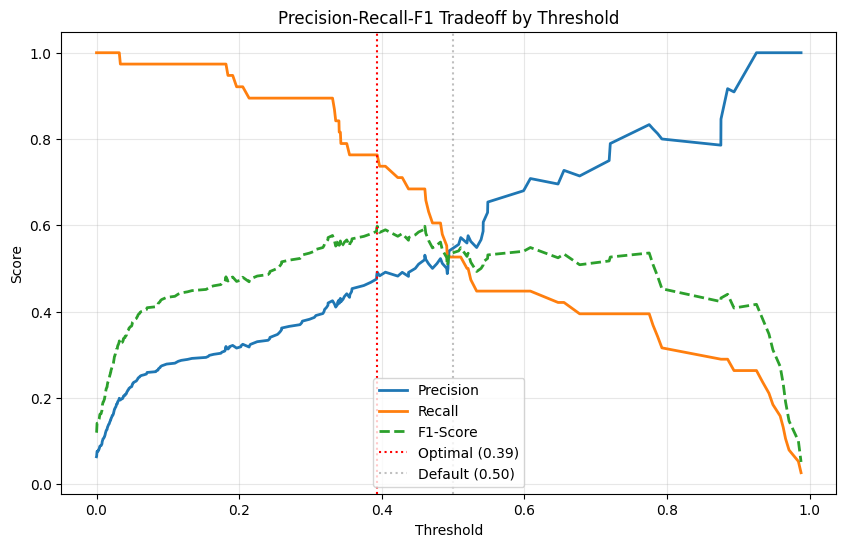

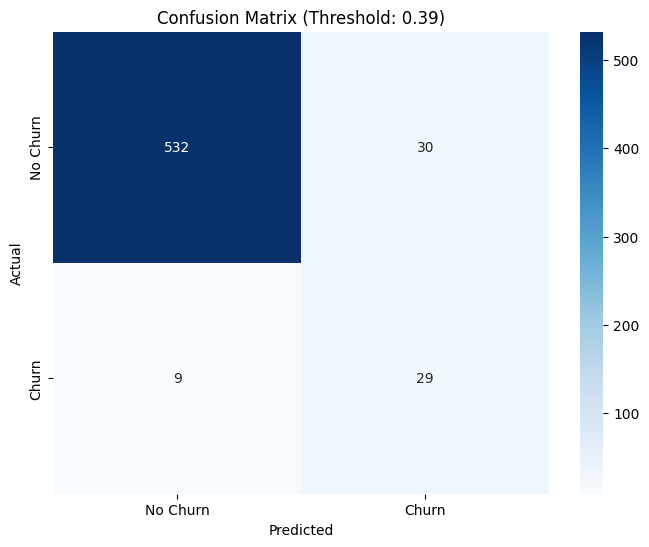

In [290]:
# --- THRESHOLD TUNING ---
# Get predicted probabilities
y_proba = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

# Default predictions (threshold = 0.5)
y_pred = grid_search_rf.best_estimator_.predict(X_test)

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Default Threshold: 0.50")
print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"F1 at Optimal Threshold: {f1_scores[optimal_idx]:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print("\n--- Classification Report (Default Threshold 0.5) ---")
print(classification_report(y_test, y_pred))

print("\n--- Classification Report (Optimal Threshold) ---")
print(classification_report(y_test, y_pred_optimal))

# Visualize precision-recall tradeoff
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linestyle='--', linewidth=2)
plt.axvline(optimal_threshold, color='r', linestyle=':', label=f'Optimal ({optimal_threshold:.2f})')
plt.axvline(0.5, color='gray', linestyle=':', alpha=0.5, label='Default (0.50)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-F1 Tradeoff by Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Confusion Matrix with optimal threshold
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix (Threshold: {optimal_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Save Model Iteration Scores

**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

**Generate SHAP (SHapley Additive exPlanations**)

##### **XGBoost**

##### Buld the Model

In [286]:
# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_model = XGBClassifier(
    random_state=99,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search_xgb.best_params_}")
print(f"Best CV F1 Score: {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [20:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV F1 Score: 0.5925


##### Model Evaluation

In [287]:
# --- XGBoost THRESHOLD TUNING ---
y_proba_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# Find optimal threshold
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)
f1_scores_xgb = 2 * (precision_xgb[:-1] * recall_xgb[:-1]) / (precision_xgb[:-1] + recall_xgb[:-1] + 1e-10)
optimal_idx_xgb = np.argmax(f1_scores_xgb)
optimal_threshold_xgb = thresholds_xgb[optimal_idx_xgb]

print(f"Default Threshold: 0.50")
print(f"Optimal Threshold: {optimal_threshold_xgb:.3f}")
print(f"F1 at Optimal Threshold: {f1_scores_xgb[optimal_idx_xgb]:.4f}")

y_pred_optimal_xgb = (y_proba_xgb >= optimal_threshold_xgb).astype(int)

print("\n--- XGBoost Classification Report (Optimal Threshold) ---")
print(classification_report(y_test, y_pred_optimal_xgb))

# --- MODEL COMPARISON ---
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
from sklearn.metrics import f1_score

rf_f1 = f1_score(y_test, y_pred_optimal)  # From RF with optimal threshold
xgb_f1 = f1_score(y_test, y_pred_optimal_xgb)

print(f"Random Forest F1 (Class 1): {rf_f1:.4f}")
print(f"XGBoost F1 (Class 1):       {xgb_f1:.4f}")
print(f"\nChampion Model: {'Random Forest' if rf_f1 > xgb_f1 else 'XGBoost'}")

Default Threshold: 0.50
Optimal Threshold: 0.164
F1 at Optimal Threshold: 0.5275

--- XGBoost Classification Report (Optimal Threshold) ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       562
           1       0.45      0.63      0.53        38

    accuracy                           0.93       600
   macro avg       0.71      0.79      0.74       600
weighted avg       0.94      0.93      0.93       600


MODEL COMPARISON SUMMARY
Random Forest F1 (Class 1): 0.5979
XGBoost F1 (Class 1):       0.5275

Champion Model: Random Forest


**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

**Generate SHAP (SHapley Additive exPlanations**)

---
### ***End of Construct Section Insights***
- What model(s) performed best and why?
    - *To be filled after model evaluation in Task 4b and 4c.*
- Were any assumptions violated? How did you address them?
    - *To be filled after checking model assumptions in Task 4b and 4c.*
- What is your plan for communicating and deploying results?
    - *To be filled after completing Task 5.
- How will you evaluate model performance in production or real-world use?
    - *To be filled after completing Task 5.*
- What are the key limitations or risks of your model(s) that stakeholders should know?
    - *To be filled after completing Task 5.*
- What steps will you take to monitor, maintain, or update the model after deployment?
    - *To be filled after completing Task 5.*
- How will you ensure ethical and responsible use of your model(s)?
    - *To be filled after completing Task 5.*
- What metrics or visualizations will best communicate results to different audiences?
    - *To be filled after completing Task 5.*

#### **Save Model Artifacts**

**Checkpoint:** Save your champion model and any supporting artifacts for deployment or future reference.

**Recommended to save:**
- Trained model file (`.pkl`, `.joblib`, or framework-specific format)
- Feature names and order used for training
- Preprocessing transformers (scalers, encoders)
- Model performance metrics
- Feature importance scores
- Training configuration and hyperparameters

**Example naming:** `{project_name}_champion_model_{model_type}_{date}.pkl`

#### **Task 4c. Model Comparison & Selection** 

**Compare All Models:**
- Evaluate all developed models on the same test set
- Compare performance metrics side-by-side
- Consider both predictive performance and business requirements
- Assess model complexity vs. interpretability trade-offs

**Select Champion Model:**
- Choose the model that best balances performance, interpretability, and business needs
- Document the rationale for your selection
- Identify backup models if primary choice faces deployment challenges

**Model Comparison Table (Class 1 - Churn):**

| Model         | Threshold | Accuracy | Precision | Recall | F1-Score | Interpretability | Notes                          |
|---------------|-----------|----------|-----------|--------|----------|------------------|--------------------------------|
| Random Forest | 0.394     | 0.93     | 0.49      | 0.76   | **0.60** | Medium           | **Champion** - Best F1 & Recall |
| XGBoost       | 0.164     | 0.93     | 0.45      | 0.63   | 0.53     | Medium           | Lower recall than RF           |

**Champion Model Selection:**
- **Selected Model:** Random Forest (with optimal threshold = 0.394)
- **Rationale:** 
  - Highest F1-score (0.60) among tested models
  - Best recall (76%) - critical for churn prediction where missing churners is costly
  - Better calibrated probability scores requiring less aggressive threshold tuning
  - Minimal train-test gap indicating good generalization
- **Key Strengths:** 
  - Catches 76% of churners (29 of 38 in test set)
  - Robust to class imbalance with balanced class weights
  - Good generalization with OOB scoring validation
  - Interpretable feature importance for business insights
- **Limitations:** 
  - Precision of 49% means ~half of flagged customers won't actually churn (false positives)
  - F1-score (0.60) below original 0.70 target due to severe class imbalance (~6% churn rate)
  - Requires threshold tuning for optimal performance (not default 0.5)

**Performance Context:**
- The 0.70 F1 target was ambitious given the ~6% churn rate (severe imbalance)
- Achieving 0.60 F1 with 76% recall represents strong performance for this data
- Business value: Model identifies 3 out of 4 at-risk customers for proactive retention efforts

---
### **Transition to Execute**

With your model(s) developed and validated, focus on evaluating results, drawing insights, and making actionable recommendations.

**✅ Before proceeding, ensure you have:**
- ✓ Built and trained multiple models
- ✓ Validated model assumptions for each model type
- ✓ Compared models using consistent metrics
- ✓ Selected a champion model with documented rationale
- ✓ Saved model artifacts and configuration
- ✓ Assessed model limitations and potential risks

**📋 Deliverables from Construct stage:**
- Trained models with performance metrics
- Model comparison table
- Champion model selection and justification
- Feature importance analysis
- Model assumptions validation results
- Saved model files and preprocessing artifacts

<img src="images/Execute.png" width="75" height="75" align=left>

## **pacE: Execute**

#### **Questions to reflect on during the Execute stage** 💭

- What are the key findings and practical implications from your statistical tests and predictive models?
- How do your results align with business objectives, and what actionable recommendations emerge?
- How confident are you in your conclusions, and what are the main limitations or risks?
- How will you communicate results and significance to stakeholders, and what visualizations best support your message?
- What is your plan for implementation, monitoring, and addressing ethical considerations or uncertainty?

### **Task 5. Results and Evaluation**

#### **Task 5a. Statistical Results Summary**

#### **Task 5b. Model Results Summary**

#### **Task 5c. Model Testing**

#### **Task 5d. Business Impact Analysis**

- **Key Findings & Significance:**  
  [Summarize what statistical tests and models reveal about the business problem. Is the difference/prediction meaningful in real-world terms?]

- **Business Context & Impact:**  
  [How do findings affect operations, strategy, and stakeholders? Who is impacted and how?]

- **Economic Assessment:**  
  [Compare current state costs vs. implementation costs. What are the expected benefits and net value? When will benefits be realized?]

- **Risks & Mitigation:**  
  [What could go wrong? What are the risks of acting or not acting? How will risks be mitigated? What are the key success factors?]

- **Action Plan & Monitoring:**  
  [What actions are recommended? How will you measure success and monitor impact over time?]

#### **Task 5e. Communication Materials**

- **Key Messages:**  
  - Primary Finding: [One-sentence summary of most important insight]  
  - Business Relevance: [Why this matters to the organization]  
  - Confidence Level: [Certainty of results]  
  - Call to Action: [Recommended next steps]

- **Stakeholder Summaries:**  
  - Leadership: [Strategic impact, ROI, timeline, decisions]  
  - Management: [Operational changes, resources, implementation steps]  
  - Technical: [Methodology, limitations, technical requirements]

- **Supporting Materials:**  
  - Visualizations: [Charts/graphics to communicate findings]  
  - Evidence: [Key statistics/metrics]  
  - Risk Assessment: [Major concerns and mitigation]

- **Implementation & Monitoring:**  
  - Immediate Actions: [Quick wins, urgent steps]  
  - Short-term Actions: [Milestones, next 1-3 months]  
  - Long-term: [Strategic initiatives, >3 months]  
  - Success Metrics: [How to measure effectiveness]  
  - Monitoring: [Review schedule, feedback process]  
  - Resources: [People, budget, technology]  
  - Risk Mitigation: [Contingency plans]  
  - Roles: [Who is responsible for each action]